# Applying PCA to Image Compression

One application of Principal Componenet Analysis is compression because it reduces dimensions and therefore needed storage. We will be compressing images by first creating vector representations before applying the maximum variance forumulation of PCA.

These are the libraries we need to import. glob helps with file paths, numpy is useful for vector/matrix calculations, and matplotlib is useful for reading and showing images as well as plotting in general.

In [2]:
import glob
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Loading facial images (the boring stuff)

The images we will be working with are 192 by 168 pixels, which we can flatten to a one dimensional vector. These vectors are representations of the images, which can then be used in calculations like finding the average, eigenvectors, etc. Combining the vectors into a matrix will give us our data matrix $X = \{x_1, x_2, ... , x_n\}$, where $x_i$ is an image vector.

In [280]:
#dpath = 'yale_subset_719'
rows = 192
cols = 168

img_files = glob.glob('yale_subset_719/*.bmp')
nimages = len(img_files)
imgs = np.zeros((rows * cols, nimages), dtype=np.uint8)

colseq = np.arange(nimages)
for i, picture in zip(colseq, img_files):
    imgs[:, i] = np.reshape(plt.imread(picture), (1, -1), order='F')

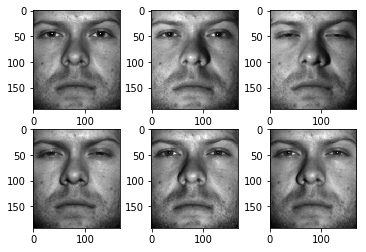

In [281]:
#plt.imshow(plt.imread(img_files[1]))
#plt.imshow(np.reshape(imgs[:,1], (rows,-1)))

fig, axes = plt.subplots(2, 3)
count = 0
for i in np.arange(2):
    for j in np.arange(3):
        axes[i, j].imshow(np.reshape(imgs[:, count], (rows, -1), order='F'), cmap='gray')
        count = count + 1

## Computing Eigenvectors/values (the fun stuff)

The maximum variance formulation of PCA maximizes the projected variance of the data points to our chosen principal subspace. Letting the basis vectors of the principal subspace be $\{u_1, u_2, ... , u_M\}$, where $u_i \in \mathbb{R}^D$, we can write the total projected variance as 

$$\frac{1}{N} \sum_{n=1}^{N} \sum_{i=1}^{M} \{u_i^Tx_n - u_i^T\bar{x}\}^2$$

which can be simplied to 

$$
\sum_{i=1}^{M} u_i^TSu_i, \text{where } S = \frac{1}{N} \sum_{n=1}^{N} (x_n - \bar{x})(x_n - \bar{x})^T
$$

Note that $S$ is the sample covariance. It can be proven that $\{u_1, u_2, ... , u_M\}$ are actually the eigenvectors of $S$, and choosing the $M$ eigenvectors that correspond to the $M$ greatest eigenvalues will maximize the projected variance. 

we will first calculate the "average" face by calculating the mean vector within $X$, before normalizing, calculating the sample covariance, and finding the $M$ greatest eigenvectors/values to compress an image with.

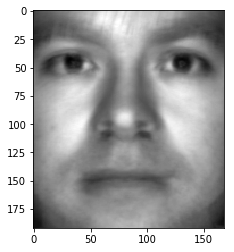

In [282]:
avg_face = np.sum(imgs, axis=1) / nimages
avg_face.astype(np.uint8)
plt.imshow(np.reshape(avg_face, (rows, -1), order='F'), cmap='gray')

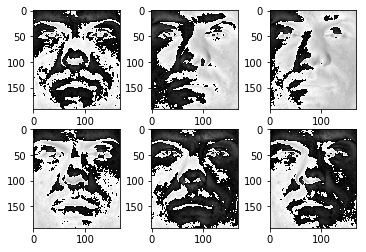

In [283]:
A = np.zeros((rows * cols, nimages), dtype=np.uint8)
for i in np.arange(nimages):
    A[:, i] = imgs[:, i] - avg_face
    
fig, axes = plt.subplots(2, 3)
count = 0
for i in np.arange(2):
    for j in np.arange(3):
        axes[i, j].imshow(np.reshape(A[:, count], (rows, -1), order='F'), cmap='gray')
        count = count + 1

In [227]:
L = np.matmul(A.T.astype(float), A.astype(float))
D, V = np.linalg.eig(L)
#D = np.sort(np.diag(D))
order = D.argsort()[::-1]
V = V[:, order]
U = np.matmul(A.astype(float), V)
U = (U - U.min(axis=0)) / U.ptp(axis=0)

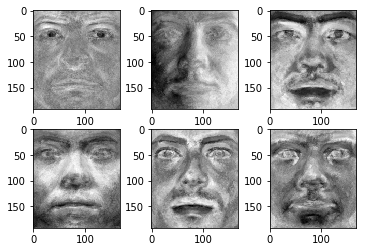

In [228]:
fig, axes = plt.subplots(2, 3)
count = 0
for i in np.arange(2):
    for j in np.arange(3):
        axes[i, j].imshow(np.reshape(U[:, count], (rows, -1), order='F'), cmap='gray')
        count = count + 1

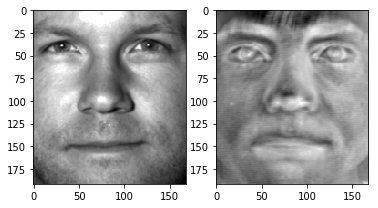

In [221]:
try_reconst = 50
n_eig = 7
omegas = np.matmul(U[:, 1:n_eig].T, (imgs[:, try_reconst] - avg_face).astype(float))
res = np.matmul(U[:, 1:n_eig], omegas) + avg_face.astype(float)

fig, axes = plt.subplots(1,2)
axes[0].imshow(np.reshape(imgs[:, try_reconst], (rows, -1), order='F'), cmap='gray')
axes[1].imshow(np.reshape(res, (rows, -1), order='F'), cmap='gray')



In [59]:
#np.sort(np.diag(D))
print(np.sort(np.diag(D)[::-1]))

[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   9.17082251e+07]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   8.76393057e+07]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   9.02538735e+07]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   2.75882060e+09]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   5.06380405e+09]
 [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   5.86172217e+10]]


In [37]:
D

array([  5.86172217e+10,   5.06380405e+09,   2.75882060e+09,
         2.43522481e+09,   1.53078774e+09,   1.31935814e+09,
         1.04483141e+09,   7.87042310e+08,   6.86374285e+08,
         6.53485441e+08,   4.88365049e+08,   4.66403519e+08,
         4.53024901e+08,   4.09372940e+08,   3.78753498e+08,
         3.74384547e+08,   3.50068910e+08,   3.34271406e+08,
         3.13556314e+08,   3.07122217e+08,   2.91531214e+08,
         2.85232358e+08,   2.75237510e+08,   2.53774735e+08,
         2.43867361e+08,   2.40098158e+08,   2.33012260e+08,
         2.23152340e+08,   2.19546052e+08,   2.11449465e+08,
         2.09537357e+08,   1.97781971e+08,   1.95975206e+08,
         1.93547587e+08,   1.86769123e+08,   1.91264185e+08,
         1.82720228e+08,   1.76662607e+08,   1.69588185e+08,
         1.67509856e+08,   1.61035446e+08,   1.64435480e+08,
         4.08342298e+07,   1.55840303e+08,   1.52795204e+08,
         4.53082397e+07,   1.52134965e+08,   4.69138942e+07,
         1.49993860e+08,

In [203]:
print(A[:, 0])
print(A[:, 0].shape)

[ 14  16  15 ..., 232 224 214]
(32256L,)


In [285]:
print(imgs[:, 0])
print(avg_face)
print(imgs[:, 0] - avg_face)
print(type(imgs[32255, 0] - avg_face[32255]))
#print(imgs[:, 0].shape)
#print(avg_face.shape)
print(imgs[32255, 0])
print(avg_face[32255])
print(A[:, 0])

[80 81 80 ..., 14 14 11]
[66 65 65 ..., 38 46 53]
[        14         16         15 ..., 4294967272 4294967264 4294967254]
<type 'numpy.uint32'>
11
53
[ 14  16  15 ..., 232 224 214]


array([], dtype=int8)

In [119]:
#ind = np.array([5,8,6,3,2]).argsort()
#ind = D.argsort()[::-1]
#print(D[ind])
#print(np.sort(np.array([[2,0,0], [0,3,0], [0,0,1]]), axis = 0))
#print(np.array([[2,0,0], [0,3,0], [0,0,1]])[ind])
#print(np.array([[2,0,0], [0,3,0], [0,0,1]]).argsort(axis=0))

plt.imread(img_files[0])

array([[80, 80, 84, ..., 63, 67, 71],
       [81, 79, 78, ..., 60, 61, 64],
       [80, 79, 82, ..., 61, 59, 62],
       ..., 
       [12, 12, 19, ..., 21, 18, 14],
       [12, 12, 15, ..., 14, 14, 14],
       [12, 12, 12, ..., 12, 12, 11]], dtype=uint8)